*Importing Libraries and Datasets*

In [1]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Books
books = pd.read_csv('https://raw.githubusercontent.com/Revati-N/AI-DS-Projects/main/Book_Recommendation_System/Datasets/Books.csv')
books.head()

C:\Users\revna\AppData\Local\Temp\ipykernel_38524\3878991255.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('https://raw.githubusercontent.com/Revati-N/AI-DS-Projects/main/Book_Recommendation_System/Datasets/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [4]:
#Ratings
ratings = pd.read_csv('https://raw.githubusercontent.com/Revati-N/AI-DS-Projects/main/Book_Recommendation_System/Datasets/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [6]:
#Users
users = pd.read_csv('https://raw.githubusercontent.com/Revati-N/AI-DS-Projects/main/Book_Recommendation_System/Datasets/Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

*Processing*

In [8]:
print("Books: null values\n",books.isna().sum(),"\n")
print("Ratings: null values\n",ratings.isna().sum(),"\n")
print("Users: null values\n",users.isna().sum())

Books: null values
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Ratings: null values
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 

Users: null values
 User-ID          0
Location         0
Age         110762
dtype: int64


In [9]:
users.drop(columns=['Age'], inplace=True)

In [10]:
#Finding Duplicates

print("Books:",books.duplicated().sum())
print("Ratings: ",ratings.duplicated().sum())
print("Users: ",users.duplicated().sum())

Books: 0
Ratings:  0
Users:  0


*Fixing Irregular Data*

In [11]:
books.iloc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [12]:
books.iloc[209538]['Book-Author'] = 'Michael Teitelbbaum'
books.iloc[209538]['Book-Title'] = 'DK Readers: The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'
books.iloc[209538]['Year-Of-Publication'] = 2000
books.iloc[209538]['Publisher'] = 'DK Publishing Inc'

In [13]:
books.iloc[220731]
books.iloc[220731]['Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
books.iloc[220731]['Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.iloc[220731]['Year-Of-Publication'] = 1990
books.iloc[220731]['Publisher'] = 'Gallimard'


In [14]:
books.iloc[221678]
books.iloc[221678][
    'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.iloc[221678]['Book-Author'] = 'James Buckley'
books.iloc[221678]['Year-Of-Publication'] = 2000
books.iloc[221678]['Publisher'] = 'DK Publishing Inc'


In [15]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [16]:
#Counting data
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
2050        2
2038        1
2037        1
2030        7
2026        1
2024        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       46
2004     5839
2003    14358
2002    17627
2001    17359
2000    17234
1999    17431
Name: count, dtype: int64

There appear to be some mistakes in the data.

In [17]:
books[books['Year-Of-Publication']>2021][['Book-Title','Year-Of-Publication','Publisher','Book-Author']]

,Book-Title,Year-Of-Publication,Publisher,Book-Author
37487,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,2030,Aladdin,Coville
55676,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,2030,Aladdin,Bruce Coville
78168,Crossing America,2030,National Geographic,National Geographic Society
80264,Alice's Adventures in Wonderland and Through t...,2050,Puffin Books,Lewis Carroll
97826,Outline of European Architecture (Pelican S.),2050,Penguin USA,Nikolaus Pevsner
116053,Three Plays of Eugene Oneill,2038,Vintage Books USA,Eugene O'Neill
118294,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,2026,Goldmann,Kathy Lette
192993,"Field Guide to the Birds of North America, 3rd...",2030,National Geographic,National Geographic Society
228173,FOREST PEOPLE (Touchstone Books (Hardcover)),2030,Simon &amp; Schuster,Colin M. Turnbull
240169,In Our Time: Stories (Scribner Classic),2030,Collier Books,Ernest Hemingway


In [18]:
# Viewing the full names
display(books.iloc[37487]['Book-Title'])
display(books.iloc[55676]['Book-Title'])
display(books.iloc[80264]['Book-Title'])
display(books.iloc[192993]['Book-Title'])


'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'

'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'

"Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"

'Field Guide to the Birds of North America, 3rd Ed.'

In [19]:
books.loc[37487, 'Year-Of-Publication'] = 1991
books.iloc[37487]


ISBN                                                          0671746103
Book-Title             MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...
Book-Author                                                      Coville
Year-Of-Publication                                                 1991
Publisher                                                        Aladdin
Image-URL-S            http://images.amazon.com/images/P/0671746103.0...
Image-URL-M            http://images.amazon.com/images/P/0671746103.0...
Image-URL-L            http://images.amazon.com/images/P/0671746103.0...
Name: 37487, dtype: object

In [20]:
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Year-Of-Publication'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[55676, 'Year-Of-Publication'] = 2005

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Book-Author'] = 'Bruce Coville'

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books.loc[80264, 'Year-Of-Publication'] = 2003

# 'Field Guide to the Birds of North America, 3rd Ed.'
books.loc[192993, 'Year-Of-Publication'] = 2003

# Crossing America
books.loc[78168, 'Year-Of-Publication'] = 2001

# Outline of European Architecture (Pelican S.)
books.loc[97826, 'Year-Of-Publication'] = 1981

# Three Plays of Eugene Oneill
books.loc[116053, 'Year-Of-Publication'] = 1995

# Setting to current date of project since no information could be found
# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
books.loc[118294, 'Year-Of-Publication'] = 2023

# FOREST PEOPLE (Touchstone Books (Hardcover))
books.loc[228173, 'Year-Of-Publication'] = 1987

# In Our Time: Stories (Scribner Classic)
books.loc[240169, 'Year-Of-Publication'] = 1996

# CLOUT
books.loc[246842, 'Year-Of-Publication'] = 1925

# To Have and Have Not
books.loc[255409, 'Year-Of-Publication'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books.loc[260974, 'Year-Of-Publication'] = 1991


In [21]:
display(books['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: count, dtype: int64

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

It seems that we have around 4618 books without year data hence set to 0

In [22]:
books[(books['Year-Of-Publication']<1400)&(books['Year-Of-Publication']>0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [23]:
books_year_rational = books[books['Year-Of-Publication']!=0]['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]
books_year_rational

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

**DATA VISUALIZATION**

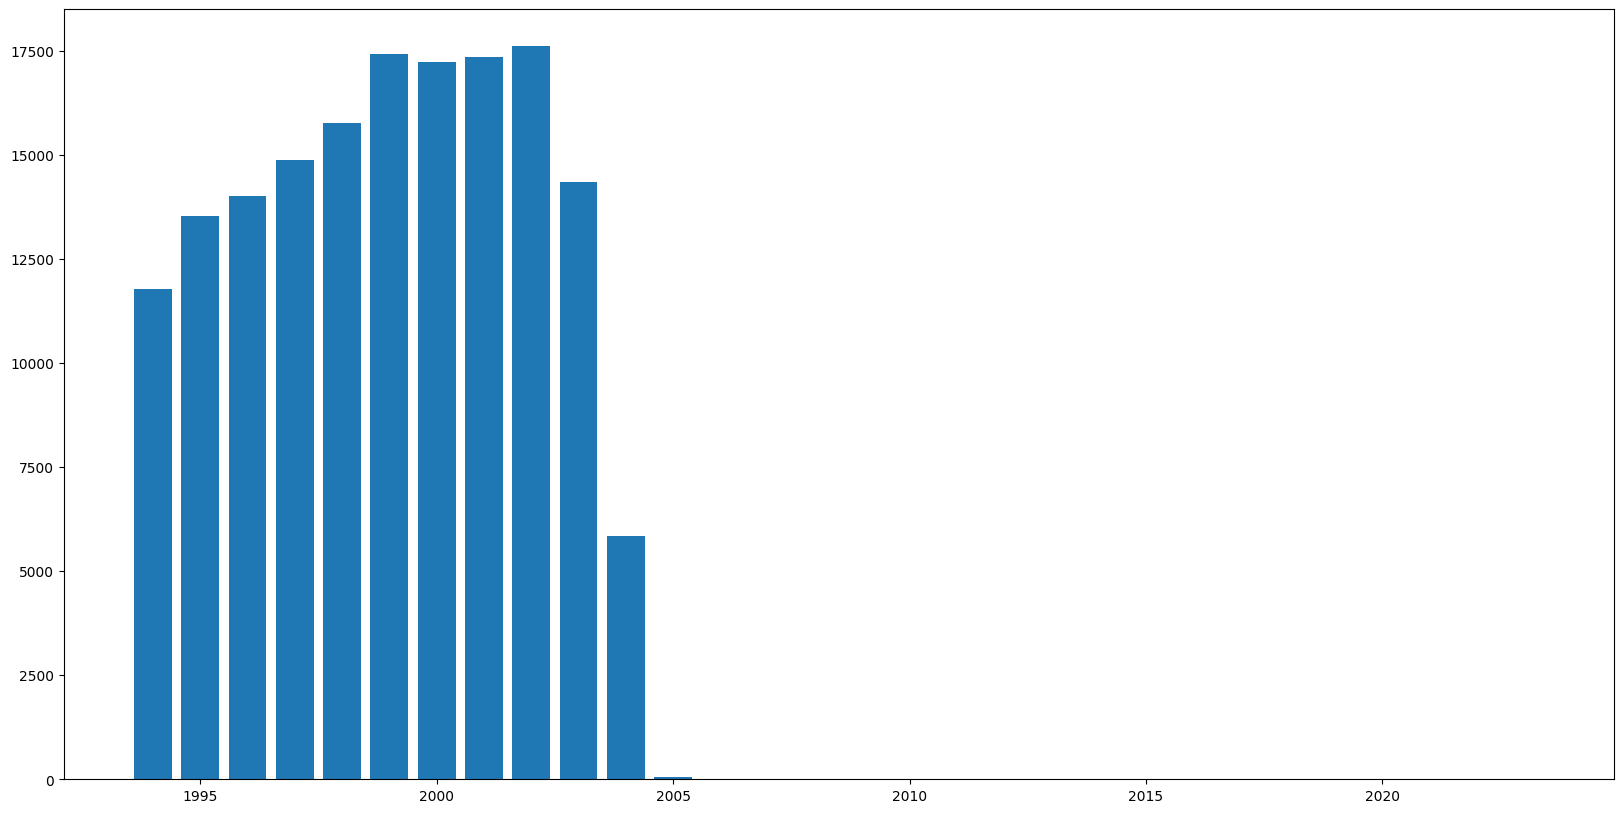

In [26]:
plt.figure(figsize=(20,10))
bars = plt.bar(x=books_year_rational.index,height=books_year_rational.values)

plt.show()

C:\Users\revna\AppData\Local\Temp\ipykernel_38524\2237186335.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(y=author_book_count_top50.index,


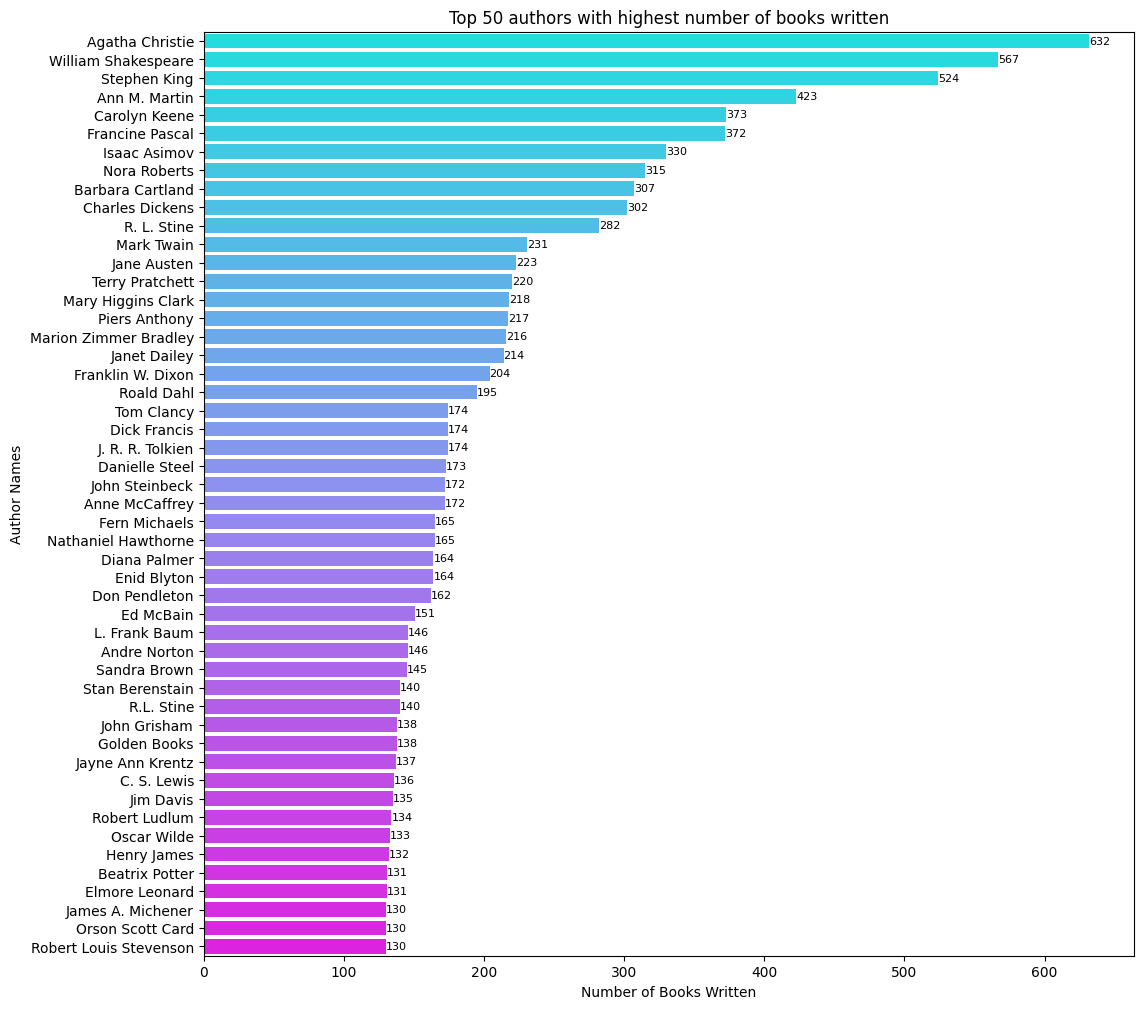

In [27]:
author_book_count = books[books['Book-Author']!= 'Not Applicable (Na )']
author_book_count_top50 = author_book_count.groupby('Book-Author').count()['Book-Title'].sort_values(ascending=False).head(50)
author_book_count_top50.head(10)

cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=author_book_count_top50.index,
                       x=author_book_count_top50.values, palette=cool, orient='h')

for i, value in enumerate(author_book_count_top50.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

plt.ylabel("Author Names")
plt.xlabel("Number of Books Written")
plt.title("Top 50 authors with highest number of books written")
plt.show()

C:\Users\revna\AppData\Local\Temp\ipykernel_38524\273986348.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(y=top_50_publishers.index,
C:\Users\revna\AppData\Local\Temp\ipykernel_38524\273986348.py:8: UserWarning: 
The palette list has fewer values (50) than needed (51) and will cycle, which may produce an uninterpretable plot.
  sns_plot = sns.barplot(y=top_50_publishers.index,


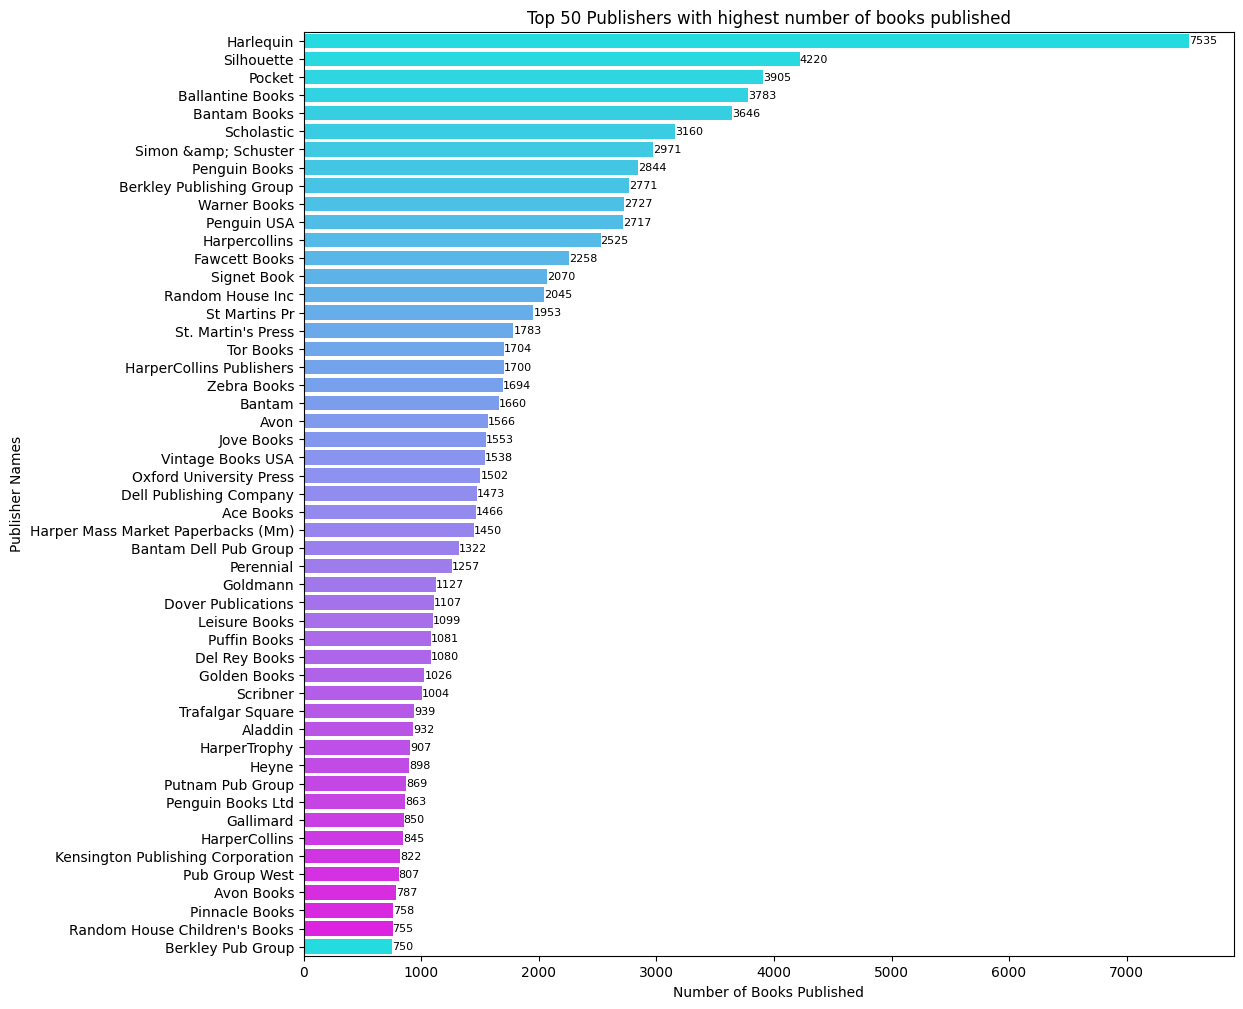

In [28]:
publishers = books['Publisher'].value_counts()
top_50_publishers = publishers.sort_values(ascending=False)[:51]

cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=top_50_publishers.index,
            x=top_50_publishers.values, palette=cool,orient='h')

for i, value in enumerate(top_50_publishers.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)
                  

plt.ylabel("Publisher Names")
plt.xlabel("Number of Books Published")
plt.title("Top 50 Publishers with highest number of books published")
plt.show()
